# importing json file


import json per la llibreria que treballa amb json

In [15]:
import json
import numpy as np #aqui hi ha les estructures de dades que faig servir
import matplotlib.pyplot as plt #per dibuixar
import scipy.io as sio #el input output d'audio (wavfile.read)
from IPython.display import Audio #el reproductor d'audio
from numpy.fft import fft, ifft #podria fer numpy.fft en comptes de fer aquest import
from wav2vec import cutvowel, wav2vec #el nostre modul

importo el meu fitxer json

In [28]:
VOCAL = 23
with open("vocals.json") as f:
    data = json.load(f)
print(data[VOCAL])

{'vocal': 'a', 'start': '4.216', 'end': '4.391'}


In [17]:
start = data[VOCAL]["start"]
end = data[VOCAL]["end"]
print(float(start))

4.216


les llibreries que necesito per utilitzar i processar audio

carrego el fitxer d'audio

In [30]:
select = VOCAL #5 i 103
start = float(data[select]["start"])
print(start)
end=float(data[select]["end"])
print(end)

Fs, audio = sio.wavfile.read("audio_momo.wav")
# Fs, audio = cutvowel("audio_momo.wav"), float(data[select]["start"]), float(data[select]["end"])
cut = audio[int(start*Fs):int(end*Fs)]

#print(Fs)
#print(len(audio)) #per mirar si és estero o mono
#print(type(audio))
#print(type(audio[0]))

#start=4.4 #realment ho agafariem del fitxer json
#end=4.6

#framesentrada = int(float(start)*Fs) #calculem la mostra d'entrada
#framesalida = int(float(end)*Fs)
#cut=audio[framesentrada:framesalida] #retallem

#cut = audio
#data[select]["vocal"]
print(Fs)
print(cut)

4.216
4.391
44100
[-5514 -5517 -5527 ...   148   127   121]


In [19]:
Audio(cut, rate=Fs)

dibuixem l'audio retallat

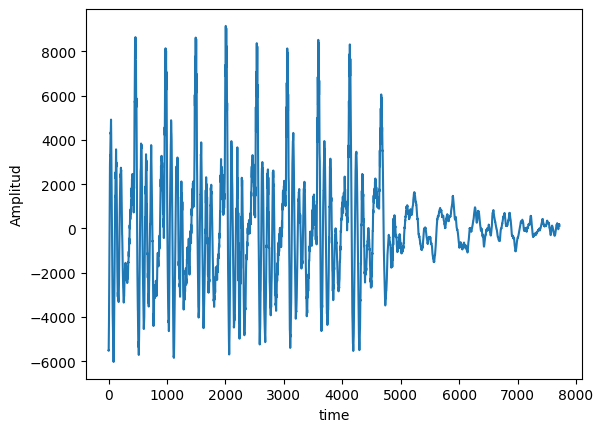

In [20]:
plt.figure()
plt.plot(cut)
plt.title("")
plt.xlabel("time")
plt.ylabel("Amplitud")
plt.show()

Dificil entendre algo. mirem fourier

/home/iticbcn/Escritorio/UA/ex-basics/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/iticbcn/Escritorio/UA/ex-basics/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


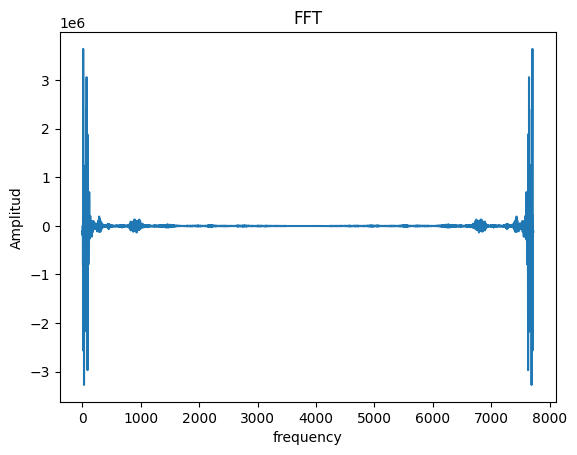

In [21]:
fourier = fft(cut)
plt.figure()
plt.plot(fourier)
plt.title("FFT")
plt.xlabel("frequency")
plt.ylabel("Amplitud")
plt.show()

només m'importa el que pasa a prop de zero

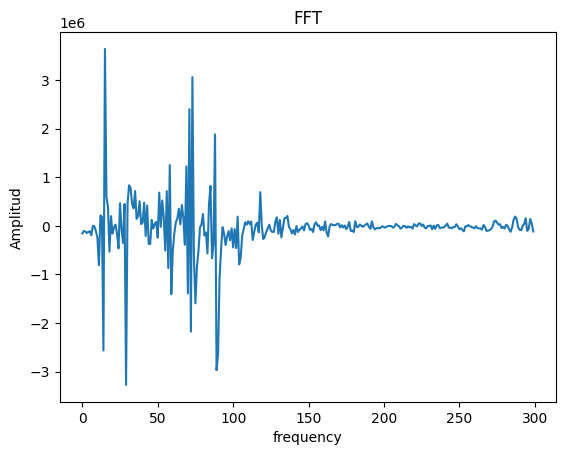

In [22]:
Fsmall = fourier[0:300]
plt.figure()
plt.plot(Fsmall)
plt.title("FFT")
plt.xlabel("frequency")
plt.ylabel("Amplitud")
plt.show()

No m'importa la fase, només el módul.


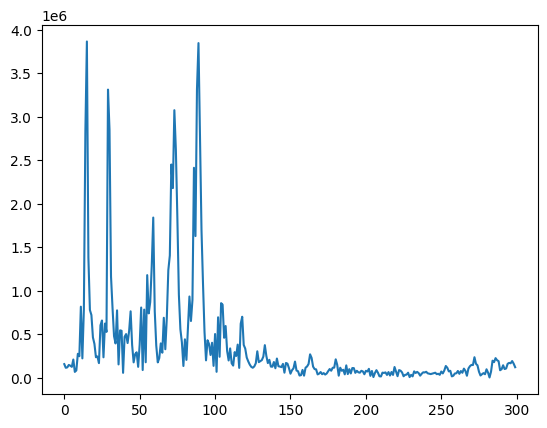

In [23]:
toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))
plt.figure()
plt.plot(toprocess)
plt.show()

Aplico un filtre per quedar eliminar soroll

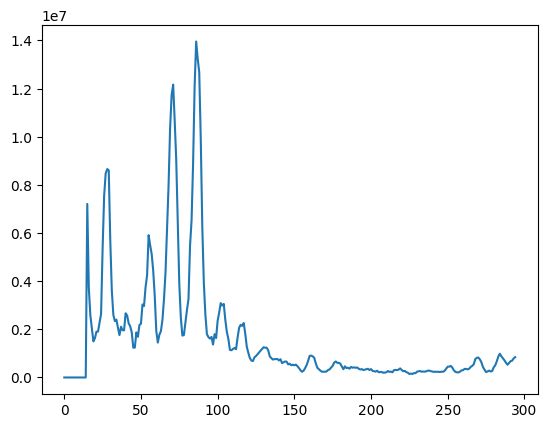

np.int64(86)

In [24]:
filter = 5
out = np.zeros(len(toprocess)-filter, dtype=np.float64)
for i in range(len(toprocess)-filter):
    for j in range(filter):
        out[i] += toprocess[i+j]

        
out[0:15] = 0
        
plt.figure()
plt.plot(out)
plt.show()

np.argmax(out)

86


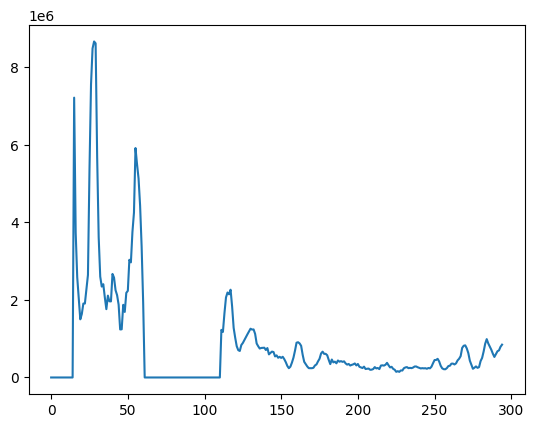

28


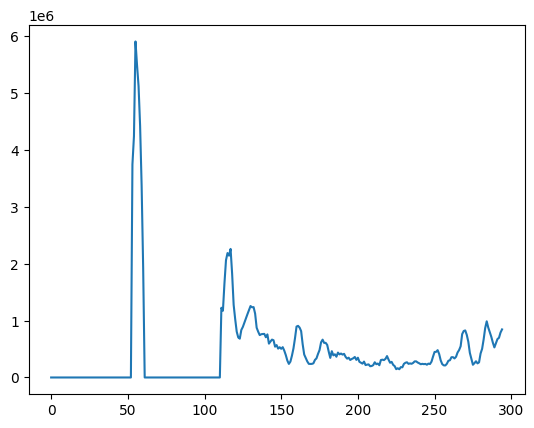

55


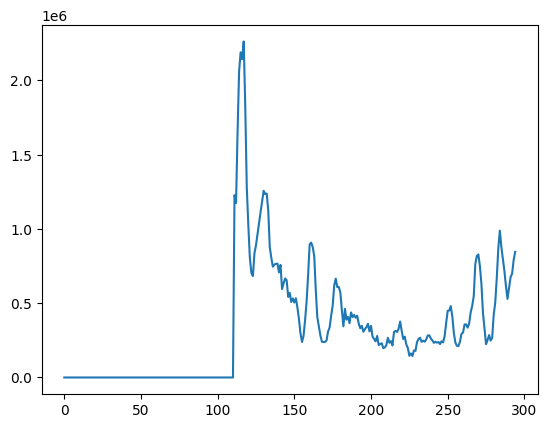

In [ ]:
filter2 = 25

maxim1 = np.argmax(out)
print(maxim1)

filmin = filter2
if maxim1 < filter2:
    filmin = maxim1

out[maxim1-filmin:maxim1+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()

maxim2 = np.argmax(out)
print(maxim2)

out[maxim2-filter2:maxim2+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()


maxim3 = np.argmax(out)
print(maxim3)

out[maxim3-filter2:maxim3+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()

In [26]:
print(fourier.size)
print(Fs)
print((maxim1)*Fs/fourier.size, "Hz")
print((maxim2)*Fs/fourier.size, "Hz")
print((maxim3)*Fs/fourier.size, "Hz")

7718
44100
491.3967349054159 Hz
159.98963462036798 Hz
314.26535371857995 Hz


In [31]:
def vocalHz(filename, vocal):
    start = float(data[vocal]["start"])
    end=float(data[vocal]["end"])
    Fs, audio = sio.wavfile.read(filename)
    cut = audio[int(start*Fs):int(end*Fs)]

    # Transformada de fourier per convertir l'àudio a freqüència
    fourier = fft(cut)

    # Retallar la frequència per treballar prop de 0
    Fsmall = fourier[0:300]

    # Agafar només els valors positius de la frequència
    toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))

    # Aplicar filtre 
    filter = 5
    out = np.zeros(len(toprocess)-filter, dtype=np.float64)
    for i in range(len(toprocess)-filter):
        for j in range(filter):
            out[i] += toprocess[i+j]
    out[0:15] = 0

    filter2 = 25
    max1 = np.argmax(out)
    filmin = filter2
    if max1 < filter2:
        filmin = max1

    out[max1-filmin:max1+filter2] = 0

    max2 = np.argmax(out)
    out[max2-filter2:max2+filter2] = 0

    max3 = np.argmax(out)
    out[max3-filter2:max3+filter2] = 0

    max1 = ((max1)*Fs/fourier.size, "Hz")
    max2 = ((max2)*Fs/fourier.size, "Hz")
    max3 = ((max3)*Fs/fourier.size, "Hz")

    return max1, max2, max3


vocalHz("audio_momo.wav", 23)

((np.float64(491.3967349054159), 'Hz'),
 (np.float64(159.98963462036798), 'Hz'),
 (np.float64(314.26535371857995), 'Hz'))